# API

Raw code snippets for api part

In [17]:
import numpy as np
import mlflow
import mdsist.util as util

from fastapi import FastAPI
from pydantic import BaseModel
import matplotlib.pyplot as plt

# Load packages
from torchinfo.layer_info import LayerInfo
import torchinfo
from torchvision import transforms
import pickle


from mdsist.dataset import MdsistDataset
from mdsist.config import DATA_DIR, PROCESSED_DATA_DIR
from mdsist.predictor import Predictor

import mlflow
import mlflow.pytorch

import mdsist.util as util
import json
import requests

from dotenv import load_dotenv

# Load envionment variables
load_dotenv()

True

## Implementation

In [18]:
## Import model from MLFlow, with below URI
MODEL_URI = 'runs:/10cb51b288134c48835a8c0b9fe66eca/model_20240930190709'
#'models:/CNNv1-production/'

device = util.get_available_device()

model = mlflow.pytorch.load_model(MODEL_URI, map_location=device)

pred = Predictor(model)

In [19]:
app = FastAPI()

In [20]:
class PredictionRequest(BaseModel):
    image: list # The input data should be an array list of 256 pixel


@app.get("/test")
async def test():
    return "It works"

@app.post("/mnist-model-prediction/")
async def predict(data: PredictionRequest):
    # pass the image as byte, then from buffer.
    
    image_array = np.frombuffer(dtype= np.uint8) # this method interprets a buffer as a 1D array. 

    # reshape uint8 to below structure
    # shape (N, 1, H, W) # N = degree of freedom, -1.  H = 28, W = 28

    images = image_array.reshape((-1, 1, 28, 28))
    
    prediction = pred.predict(images)

    print(prediction)
    #return{"prediction": int(prediction[0])}


### Predictor test

In [21]:
## Import model from MLFlow, with below URI
MODEL_URI = "runs:/10cb51b288134c48835a8c0b9fe66eca/model_20240930190709"
#'models:/CNNv1-production/'

device = util.get_available_device()

model = mlflow.pytorch.load_model(MODEL_URI, map_location=device)

pred = Predictor(model)

In [22]:
test_dataset = MdsistDataset(PROCESSED_DATA_DIR / 'test.parquet')
image_dict = test_dataset.data.loc[0, "image"]
image_array = test_dataset.decode_png_image(image_dict)
image = image_array.tobytes()

In [23]:
print(image_array)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  45 229 255 188   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   0   0  80
  107  21   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   0  77 239
  253  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 124 253 253 187   0   0   

## API test

In [24]:

with open(DATA_DIR /'images_jpg/test/0/13.jpg', 'rb') as p:
    image = p.read()

In [25]:
def get_img_bytes(inds):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    test_dataset = MdsistDataset(PROCESSED_DATA_DIR / 'test.parquet',transform=transform)
    images= []

    for ind in inds:
        image_dict = test_dataset.data.loc[ind, "image"]
        image_array = np.array([test_dataset.decode_png_image(image_dict)])
        #print(image_array)
        plt.imshow(image_array[0], cmap='gray')
        plt.axis('off')
        plt.show()
        images.append(image_array)

    #print(np.array(images).shape)
    return np.array(images).dumps()

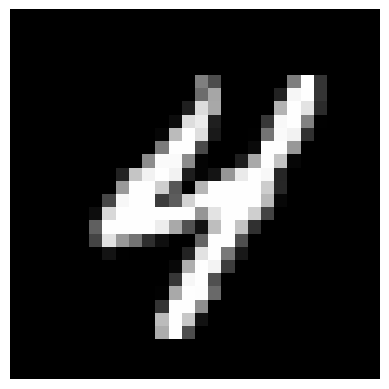

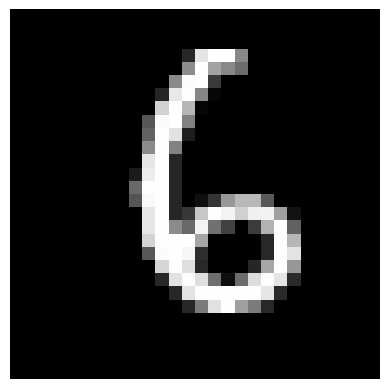

b'\x80\x02cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02c_codecs\nencode\nq\x03X\x01\x00\x00\x00bq\x04X\x06\x00\x00\x00latin1q\x05\x86q\x06Rq\x07\x87q\x08Rq\t(K\x01(K\x02K\x01K\x1cK\x1ctq\ncnumpy\ndtype\nq\x0bX\x02\x00\x00\x00u1q\x0c\x89\x88\x87q\rRq\x0e(K\x03X\x01\x00\x00\x00|q\x0fNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x10b\x89h\x03X\xdb\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [26]:
get_img_bytes([6,7])

In [27]:
response = requests.get("http://localhost:8000/")
print(json.loads(response.text))

{'message': 'OK', 'status-code': 200, 'data': {'message': 'Welcome. See /docs for more information about the api'}}


In [28]:
response = requests.get("http://localhost:8000/info")
print(json.loads(response.text))

{'message': 'OK', 'status-code': 200, 'data': {'Name': 'MDSIST-CNN', 'Short Description': 'This is a Convolutional Neural Network (CNN) model to classify grayscale images from the MNIST dataset.', 'Description': 'The primary intended use of this model is to classify images of handwritten digits from the MNIST dataset into one of ten categories (0-9). It was specifically designed for image classification tasks without requiring additional fine-tuning or integration into larger applications. This model is ideal for educational, research, and benchmarking purposes within the field of machine learning, particularly in the area of digit recognition.', 'Layers': {'CNN (CNN)': ['Conv2d (conv1): 1-1', 'Conv2d (conv2): 1-2', 'Linear (fc1): 1-3', 'Linear (fc2): 1-4', 'MaxPool2d (pool): 1-5']}, 'Total parameters': 206922, 'Trainable params': 206922, 'Total param bytes': 827688}}


Now, it should work fine

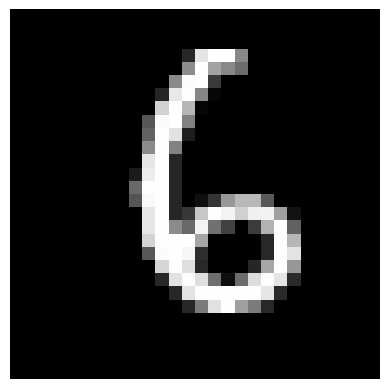

{"detail":[{"type":"missing","loc":["body","files"],"msg":"Field required","input":null}]}


In [29]:
# Set the headers to indicate the content type as 'application/octet-stream'
#headers = {'Content-Type': 'application/octet-stream'}
resp = requests.post("http://localhost:8000/mnist-model-prediction",data={"format":"raw"} ,files=[('data',get_img_bytes([7]))])
print(resp.text)

### Summary testing

In [30]:
a:torchinfo.ModelStatistics = torchinfo.summary(model)


more testing

In [31]:
a.total_param_bytes
t:list[LayerInfo] = a.summary_list
li:LayerInfo = t[3]
li.get_layer_name(True,True)

'Linear (fc1): 1-3'